In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")

In [2]:
from tqdm import tqdm
with open("/srv/hd7/jheuristic/cartman/OpenSubtitles2016.en-ru.en") as f:
    lines = [['opensub',line] for line in tqdm(f)]

18713837it [00:13, 1348824.41it/s]


In [3]:
batch_size = 100
conv_chunks = [lines[i:i+batch_size] 
               for i in range(0,len(lines) - batch_size +1,batch_size)]

In [48]:
from utils.preprocessor import Preprocessor

preproc = Preprocessor.from_conversations(conv_chunks,max_tokens=50000,verbose=True)


100%|██████████| 187138/187138 [07:55<00:00, 393.28it/s]

50000 out of 369314 tokens, coverage=0.99260)


# token coverage

100%|██████████| 187138/187138 [07:54<00:00, 394.69it/s]


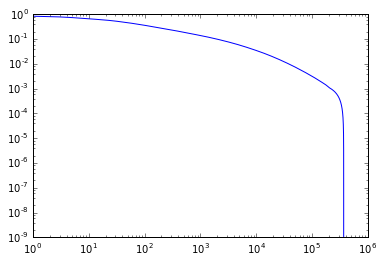

In [43]:
from tqdm import tqdm
from utils.preprocessor import default_tokenizer as tokenizer
from collections import Counter



token_freqs = Counter()
for conversation in tqdm(conv_chunks):
    for (speaker,phrase) in conversation:
        token_freqs.update(tokenizer.tokenize(Preprocessor.preprocess_phrase(phrase)))
        
        
import numpy as np
total = float(sum(token_freqs.values()))
covered = np.cumsum([freq for token,freq in token_freqs.most_common()])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(1-covered/total)
plt.xscale('log')
plt.yscale('log')

In [26]:
from utils.southpark import get_conversations
conversations = get_conversations("/srv/hd7/jheuristic/cartman/sp.json")
    
from utils.preprocessor import Preprocessor

preproc = Preprocessor.from_conversations(conversations,verbose=True)


100%|██████████| 7285/7285 [00:03<00:00, 2215.80it/s]

23281 out of 23281 tokens, coverage=1.00000)


0.836196529806


/home/jheuristic/thenv/lib/python2.7/site-packages/ipykernel/__main__.py:1: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if __name__ == '__main__':
/home/jheuristic/thenv/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for ndarrays and will be removed in a future version


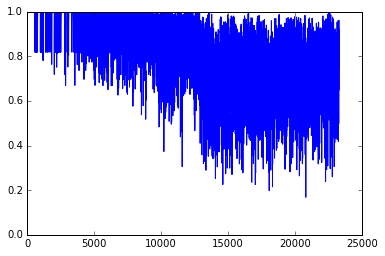

In [46]:
cross_coverage = np.array([spark_token in token_freqs for spark_token in preproc.tokens])
from pandas import ewma

print cross_coverage.mean()
plt.plot(ewma(cross_coverage,span=10))
    